# **Deber No.5 (Panel Data)**
### *Creado por: Carlos Brusil*



*   Fecha de Creación: 21 de mayo  de 2023
*   Fechad de actualización: 
*   Descripción:Manejar la data segun preferencia sea en panel de datos, corte transversal o series de tiempo

In [1]:
import pandas as pd #importo la libreria panda permite manipular y molderar los datos 
import numpy as np #importo la libreria numpy manipular y molderar los datos 
import matplotlib.pyplot as plt #importo libreria matplotlib que es una libreria que me permite realizar graficas en 2 dimensiones de de mis datos
import seaborn as sns #Esta libreria nos permite modificar la vizualizacion de los datos atraves de los coleres y mejorar presetancion de los mismo 
from sklearn.linear_model import LinearRegression #para realizar regresiones y modelos
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler #Herramienta para la estandarizaci[on de datos
from sklearn.model_selection import train_test_split #herramienta para validacion prueba entrebamiento
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


import statsmodels.stats.api as sms # paquete para modelamiento estadistico
import statsmodels.api as sm
from statsmodels.formula.api import ols #importo el paquete de requesión de cuadrados ordinarios
from statsmodels.compat import lzip

In [2]:
wmt_df = pd.read_csv('Walmart(1).csv')

In [3]:
wmt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
wmt_df.columns= wmt_df.columns.str.lower() #Defino a todos los nombres de las columnas en letra minuscula

In [5]:
wmt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         6435 non-null   int64  
 1   date          6435 non-null   object 
 2   weekly_sales  6435 non-null   float64
 3   holiday_flag  6435 non-null   int64  
 4   temperature   6435 non-null   float64
 5   fuel_price    6435 non-null   float64
 6   cpi           6435 non-null   float64
 7   unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
wmt_df

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


### Revivision de la data

In [7]:
# en el siguiente codigo creare un codigo que me permita calcular el ratio de valores perdidos para cada columna.
mv = wmt_df.isnull().sum() # creo una variable que realice la suma de cada missing values de las columnas del data frame
td = len(wmt_df) #creo una variable que cuente la longitud de los datos totales de mi data frame
mvrt = round(((mv/td)*100),2) #creo el ratio que itera cada columna del data frame y lo divide para el total de observaciones
mvrt #este ratio muestra cual es el porcentaje de datos perdidos

store           0.0
date            0.0
weekly_sales    0.0
holiday_flag    0.0
temperature     0.0
fuel_price      0.0
cpi             0.0
unemployment    0.0
dtype: float64

In [8]:
# en el siguiente codigo creare un codigo que me permita calcular el ratio de valores perdidos para cada columna.
mv = wmt_df.isna().sum() # creo una variable que realice la suma de cada missing values de las columnas del data frame
td = len(wmt_df) #creo una variable que cuente la longitud de los datos totales de mi data frame
mvrt = round(((mv/td)*100),2) #creo el ratio que itera cada columna del data frame y lo divide para el total de observaciones
mvrt #este ratio muestra cual es el porcentaje de datos perdidos

store           0.0
date            0.0
weekly_sales    0.0
holiday_flag    0.0
temperature     0.0
fuel_price      0.0
cpi             0.0
unemployment    0.0
dtype: float64

Se observa que no existen valores perdidos, todavia debemos observar los diferentes valores y si existen outliers

In [9]:
var_cuant = wmt_df.select_dtypes('number').columns
var_cual  = wmt_df.select_dtypes('object').columns

In [10]:
round(wmt_df.describe(),2)

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1046964.88,0.07,60.66,3.36,171.58,8.00
std,12.99,564366.62,0.26,18.44,0.46,39.36,1.88
min,1.00,209986.25,0.00,-2.06,2.47,126.06,3.88
25%,12.00,553350.10,0.00,47.46,2.93,131.74,6.89
50%,23.00,960746.04,0.00,62.67,3.44,182.62,7.87
75%,34.00,1420158.66,0.00,74.94,3.74,212.74,8.62
max,45.00,3818686.45,1.00,100.14,4.47,227.23,14.31


array([[<AxesSubplot:title={'center':'weekly_sales'}>,
        <AxesSubplot:title={'center':'temperature'}>],
       [<AxesSubplot:title={'center':'fuel_price'}>,
        <AxesSubplot:title={'center':'cpi'}>],
       [<AxesSubplot:title={'center':'unemployment'}>, <AxesSubplot:>]],
      dtype=object)

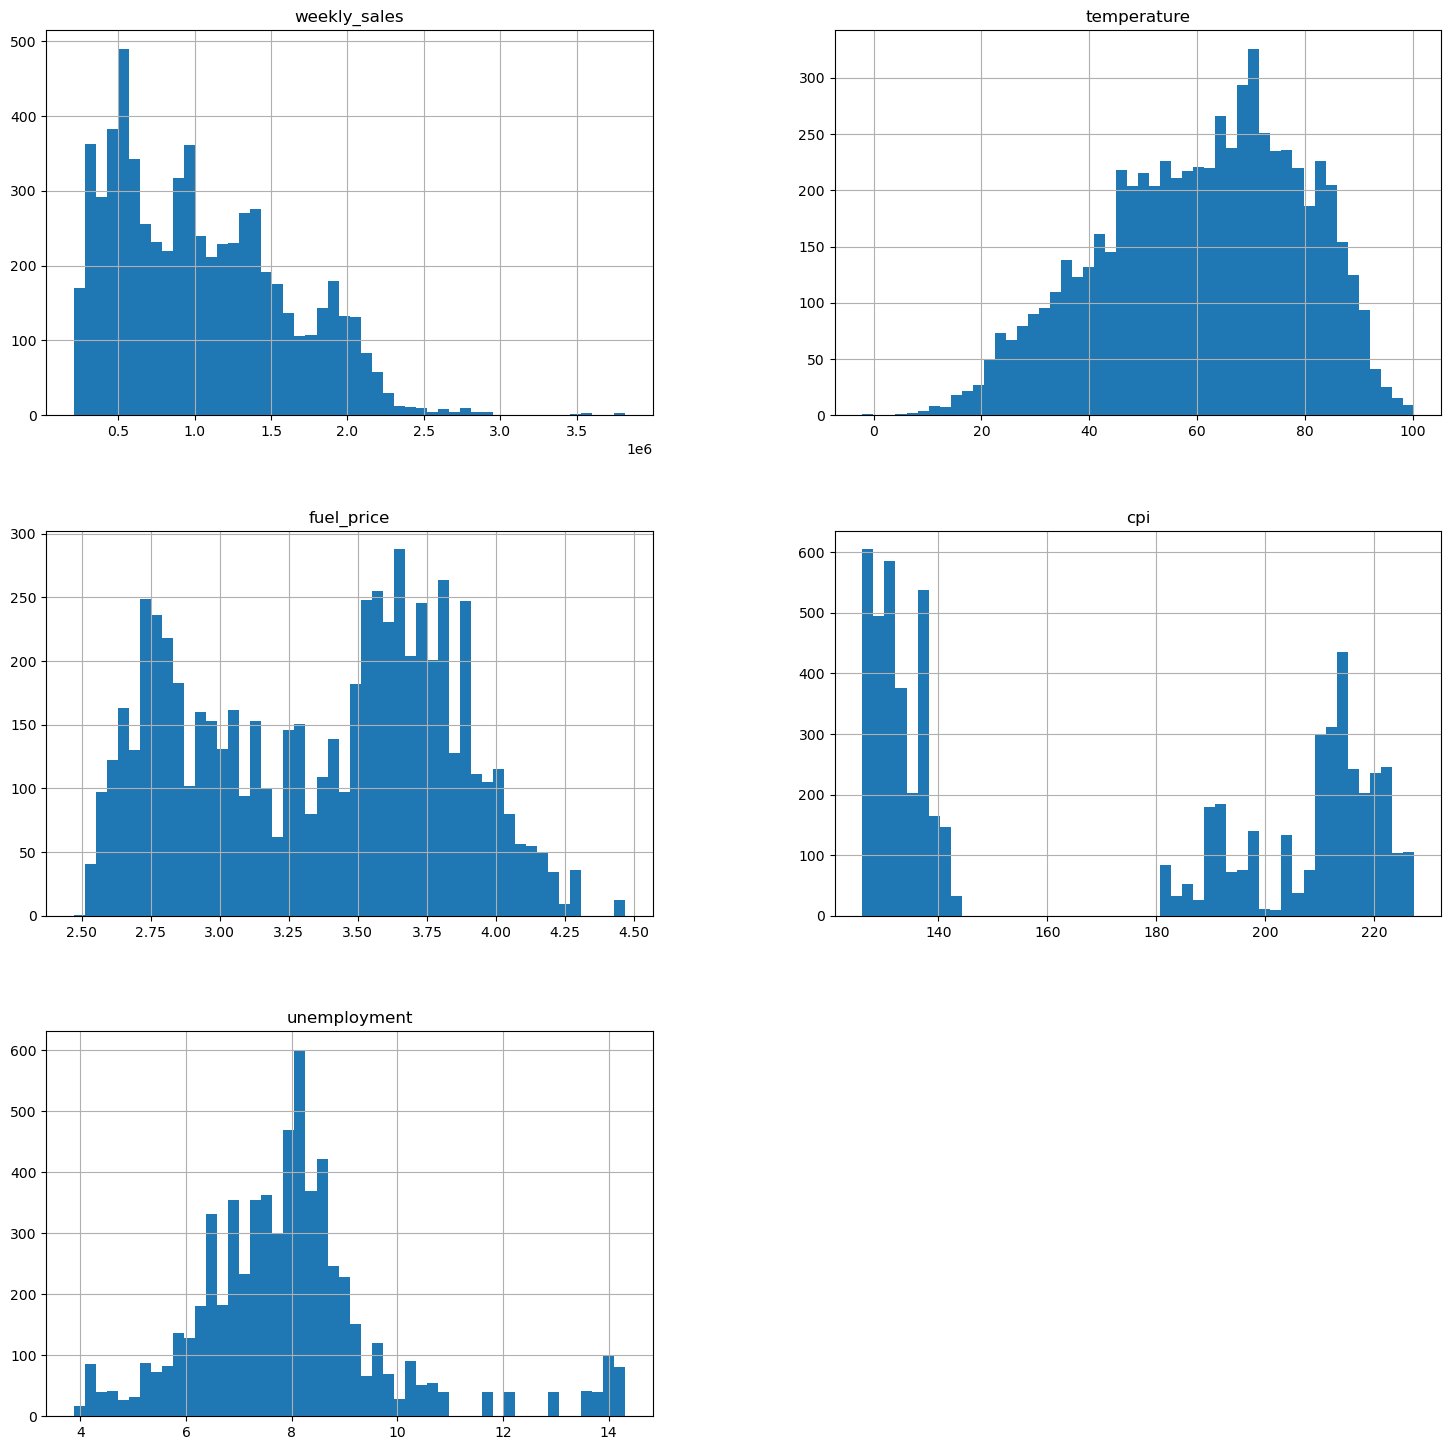

In [11]:
#graficpos de distribucion de mis variables continuas 
wmt_df.loc[:,['weekly_sales', 'temperature', 'fuel_price', 'cpi','unemployment']].hist(bins=50, figsize=(18,18), xlabelsize='10', ylabelsize='10', xrot= 0 ) # en este codigo primero defino todos los valores que deseo visualizar
# en este caso estoy pidiendo todas las columnas y filas ademas el bind que le pido que sean 25 secuencias para fines vizuales y el ta;o de las etiquetas en loes ejes
# ademas del xrot que me permite definir el angulo de las etiquetas en los ejes en este caso al no ser demasiado largas escojo una rotacion de 0 grados 

In [12]:
lsales=np.log(wmt_df.weekly_sales)
wmt_df['lsales']=lsales

array([[<AxesSubplot:title={'center':'weekly_sales'}>,
        <AxesSubplot:title={'center':'temperature'}>],
       [<AxesSubplot:title={'center':'fuel_price'}>,
        <AxesSubplot:title={'center':'cpi'}>],
       [<AxesSubplot:title={'center':'unemployment'}>,
        <AxesSubplot:title={'center':'lsales'}>]], dtype=object)

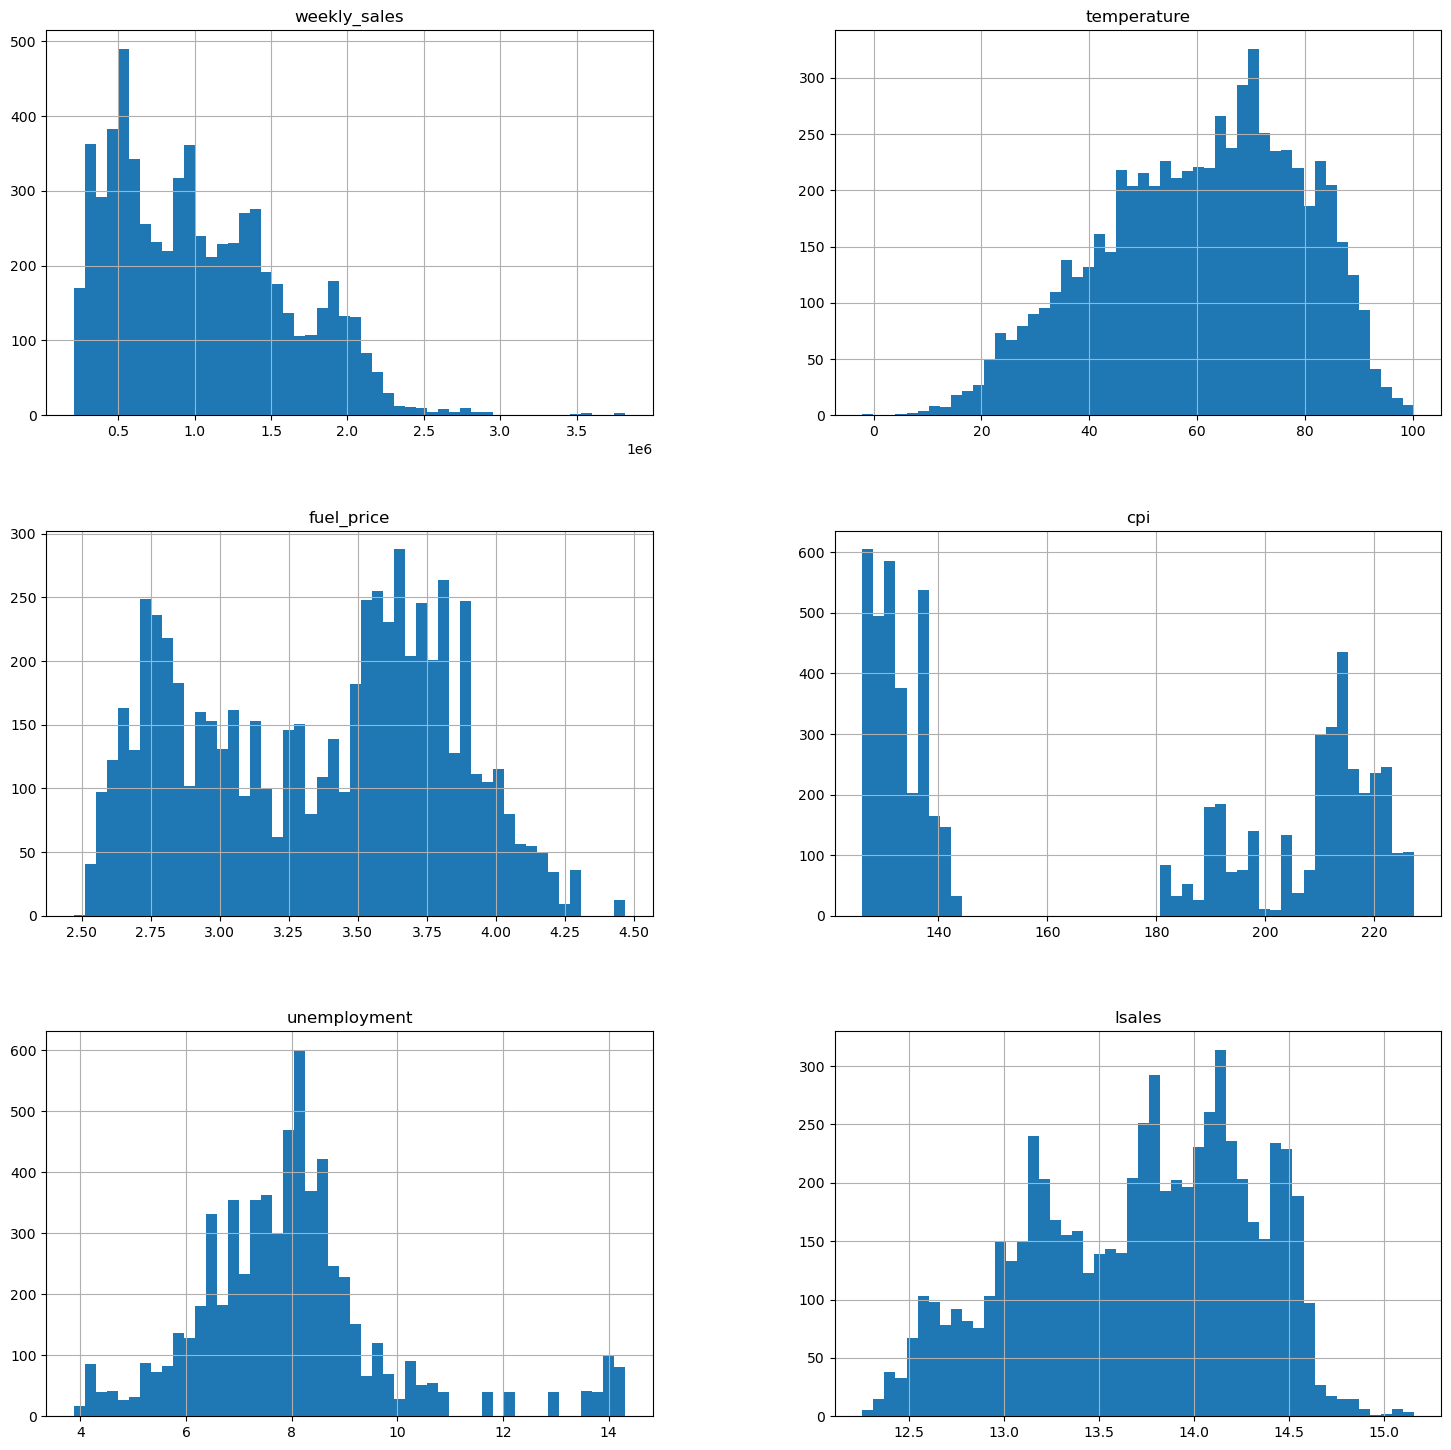

In [13]:
#graficpos de distribucion de mis variables continuas 
wmt_df.loc[:,['weekly_sales', 'temperature', 'fuel_price', 'cpi','unemployment','lsales']].hist(bins=50, figsize=(18,18), xlabelsize='10', ylabelsize='10', xrot= 0 ) # en este codigo primero defino todos los valores que deseo visualizar
# en este caso estoy pidiendo todas las columnas y filas ademas el bind que le pido que sean 25 secuencias para fines vizuales y el ta;o de las etiquetas en loes ejes
# ademas del xrot que me permite definir el angulo de las etiquetas en los ejes en este caso al no ser demasiado largas escojo una rotacion de 0 grados 

Los valores de ventas e tratan debido al desbalance, mediante el uso del logaritmo la distribucion se ajusta de mejor manera 

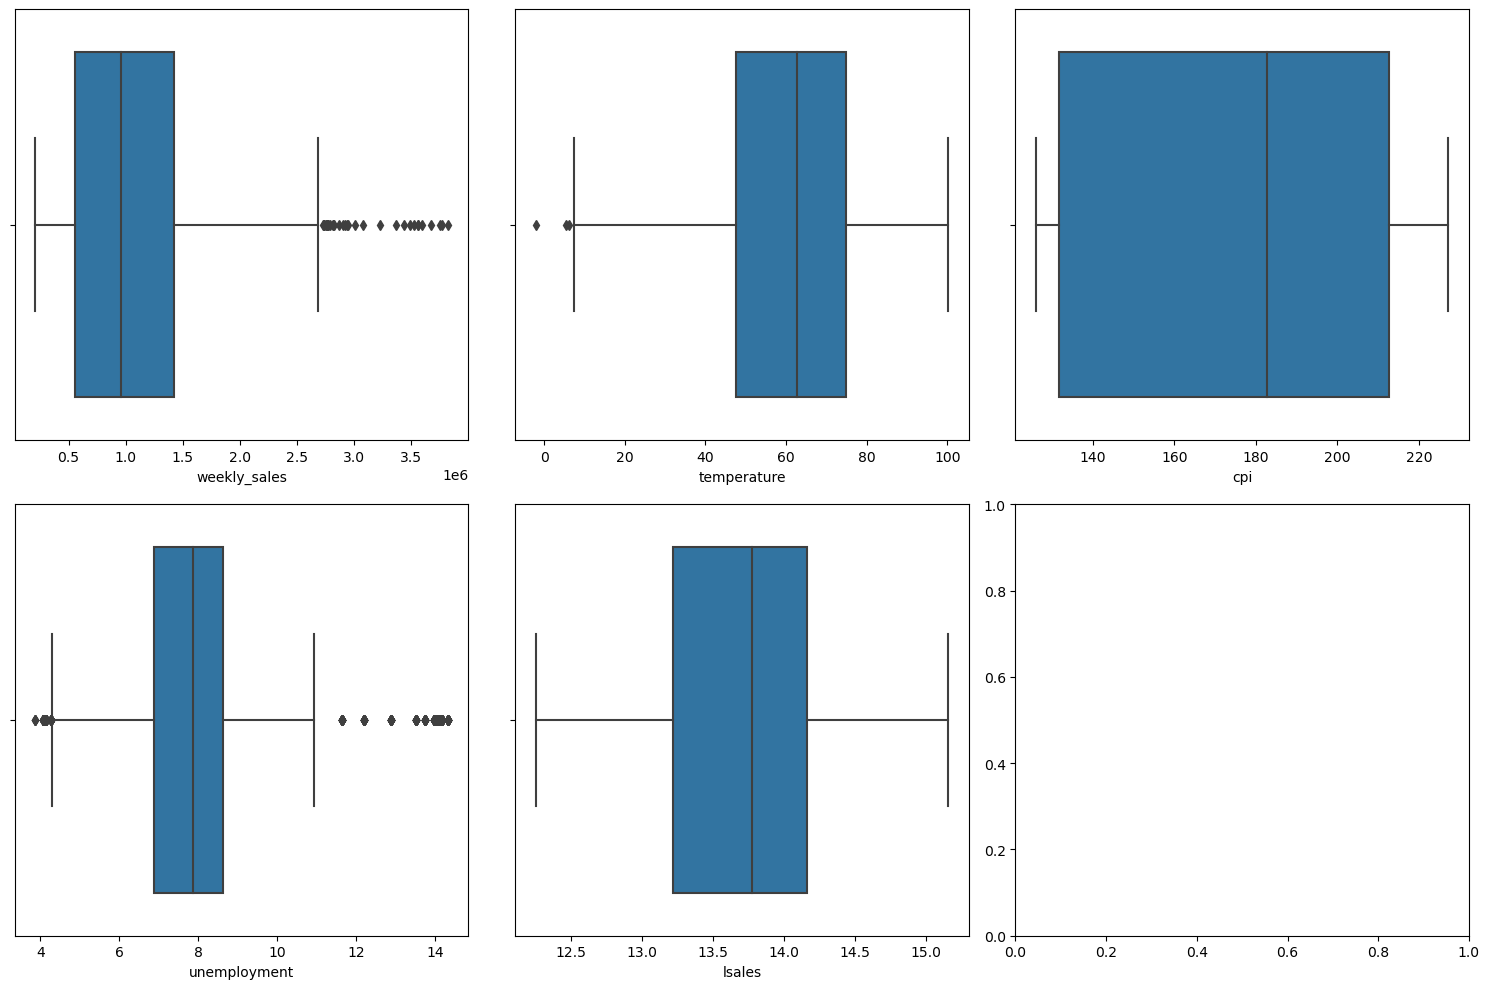

In [14]:
%matplotlib inline
fig, axs = plt.subplots(2,3, figsize = (15,10))

plt1 = sns.boxplot(wmt_df['weekly_sales'], ax = axs[0,0])
plt2 = sns.boxplot(wmt_df['temperature'], ax = axs[0,1])
plt3 = sns.boxplot(wmt_df['cpi'], ax = axs[0,2])
plt1 = sns.boxplot(wmt_df['unemployment'], ax = axs[1,0])
plt2 = sns.boxplot(wmt_df['lsales'], ax = axs[1,1])

plt.tight_layout()

In [15]:
Q1 = wmt_df.unemployment.quantile(0.25)
Q3 = wmt_df.unemployment.quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(round(IQR,2)) #Obtenemos el rango intercuartil para segmentar los valores atipicos y obtener una base definitiva 

1.73


In [16]:
wmt_df= wmt_df[~((wmt_df['unemployment'] < (Q1 - 1.5 * IQR)) |(wmt_df['unemployment'] > (Q3 + 1.5 * IQR)))]
wmt_df.shape

(5954, 9)

<AxesSubplot:xlabel='unemployment', ylabel='Density'>

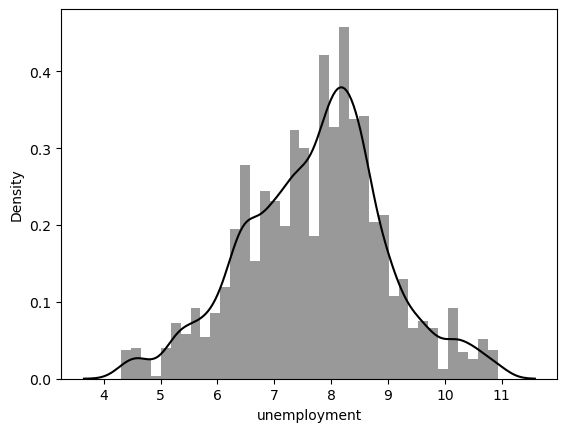

In [17]:
sns.distplot(wmt_df['unemployment'],color="black")

Tras el recorte de los outliers para la variable de desempleo obtenemos valores mas normalizados 

In [18]:
corr = round(wmt_df.corr(),3)
corr

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,lsales
store,1.000,-0.322,0.001,-0.022,0.050,-0.205,0.309,-0.276
weekly_sales,-0.322,1.000,0.037,-0.061,0.011,-0.087,-0.075,0.957
holiday_flag,0.001,0.037,1.000,-0.157,-0.077,-0.003,0.010,0.027
temperature,-0.022,-0.061,-0.157,1.000,0.148,0.219,0.026,-0.092
fuel_price,0.050,0.011,-0.077,0.148,1.000,-0.143,-0.104,0.016
cpi,-0.205,-0.087,-0.003,0.219,-0.143,1.000,-0.216,-0.089
unemployment,0.309,-0.075,0.010,0.026,-0.104,-0.216,1.000,-0.040
lsales,-0.276,0.957,0.027,-0.092,0.016,-0.089,-0.040,1.000


<AxesSubplot:>

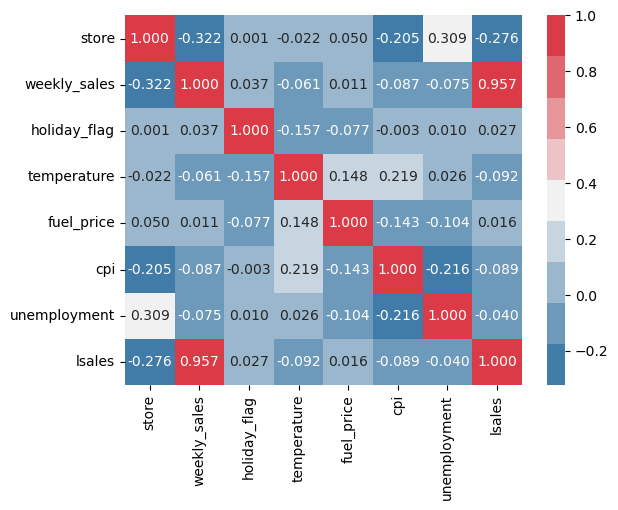

In [19]:
sns.heatmap(corr, cmap = sns.diverging_palette(240, 10, n=9), annot= True, fmt = '.3f') 

Tras la revision podemos observar que existe una relacion entre las variables donde el valor desempleo, el precio de la gasolina y la temperatura tienen un efecto de relacion inversa con las ventas de la tienda.

### Modelo 

In [20]:
wmt_df=wmt_df.set_index(['date', 'store']) # defino los indices de tiempo(t) e indviduo (i)

In [21]:
fecha = wmt_df.index.get_level_values('date').to_list()
wmt_df['fecha'] = pd.Categorical(fecha)

#### Modelo pooled ols

In [22]:
pip install linearmodels

Note: you may need to restart the kernel to use updated packages.


In [23]:
from linearmodels import PooledOLS
import statsmodels.api as sm

In [24]:
wmt_df.columns

Index(['weekly_sales', 'holiday_flag', 'temperature', 'fuel_price', 'cpi',
       'unemployment', 'lsales', 'fecha'],
      dtype='object')

In [25]:
X = wmt_df.loc[:,['holiday_flag', 'temperature', 'fuel_price', 'cpi',
       'unemployment']]
y = wmt_df.loc[:,'lsales']

In [26]:
X.shape

(5954, 5)

In [27]:
y.shape

(5954,)

In [28]:
model1 = PooledOLS(y, X)
rpooled = model1.fit(cov_type='clustered', cluster_entity=True)

In [30]:
pooled_pred = rpooled.predict().fitted_values
pooledresid = rpooled.resids

In [31]:
rpooled

Dep. Variable:,lsales,R-squared:,0.9914
Estimator:,PooledOLS,R-squared (Between):,0.9974
No. Observations:,5954,R-squared (Within):,-2.2839
Date:,"Sun, May 21 2023",R-squared (Overall):,0.9914
Time:,13:07:04,Log-likelihood,-9867.9
Cov. Estimator:,Clustered,,
,,F-statistic:,1.378e+05
Entities:,143,P-value,0.0000
Avg Obs:,41.636,Distribution:,"F(5,5949)"
Min Obs:,40.000,,
Max Obs:,42.000,F-statistic (robust):,1.646e+04


En el resumen deresultados se observa que el mejor valor r cuadrado es el predictor de los estadistics intragrupales (Whithin), tambien se ve que las variables con estadisticamente significativas son el preciode la gasolina, llos idices de precio al consumidor y la tasa de desempleo 

### Verificacion de los supuestos 

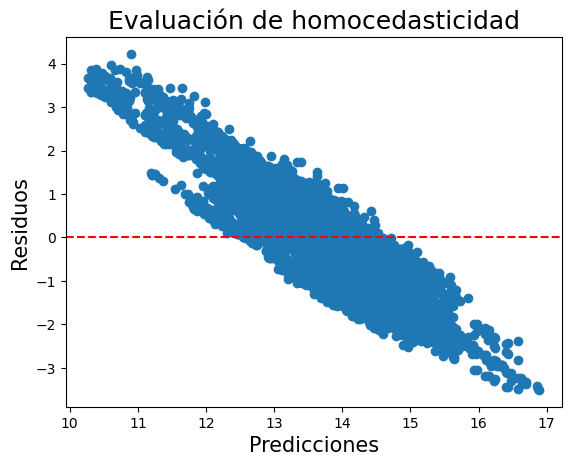

In [32]:
fig, ax = plt.subplots()
ax.scatter(pooled_pred, pooledresid)
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicciones', fontsize = 15)
ax.set_ylabel('Residuos', fontsize = 15)
ax.set_title('Evaluación de homocedasticidad', fontsize = 18)
plt.show()

In [33]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [35]:
pooled_df = pd.concat([wmt_df, pooledresid], axis=1)
pooled_df = pooled_df.drop(['fecha'], axis = 1).fillna(0)
X_ = sm.tools.tools.add_constant(X).fillna(0)

In [37]:
pooled_df

,,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,lsales,residual
date,store,,,,,,,,
05-02-2010,1,1643690.90,0,42.31,2.572,211.096358,8.106,14.312455,1.279890
12-02-2010,1,1641957.44,1,38.51,2.548,211.242170,8.106,14.311400,0.942039
19-02-2010,1,1611968.17,0,39.93,2.514,211.289143,8.106,14.292966,1.359834
26-02-2010,1,1409727.59,0,46.63,2.561,211.319643,8.106,14.158907,1.150391
05-03-2010,1,1554806.68,0,46.50,2.625,211.350143,8.106,14.256862,1.129894
...,...,...,...,...,...,...,...,...,...
28-09-2012,45,713173.95,0,64.88,3.997,192.013558,8.684,13.477481,-2.177024
05-10-2012,45,733455.07,0,64.89,3.985,192.170412,8.667,13.505522,-2.119121
12-10-2012,45,734464.36,0,54.47,4.000,192.327265,8.667,13.506897,-2.165896


In [38]:
breusch_pagan = het_breuschpagan(pooled_df.residual, X_)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, breusch_pagan)))

{'LM-Stat': 822.0226078549115, 'LM p-val': 1.9896979869562912e-175, 'F-Stat': 190.5460643300816, 'F p-val': 8.006944823738674e-189}


Como el valor del estadistico es menor al 0,5  rechazamos la hipotesis nula y aceptamos la presencia de heterocedasticidad en los errores.

In [39]:
from statsmodels.stats.stattools import durbin_watson

In [40]:
dw = durbin_watson(pooled_df.residual) 
print(dw)

0.050183880764111045


Existe correlacion positiva por lo cual contradiciendo los 2 ultimos supuesto se core el test de hausman para encontrar el mejor modelo.

In [56]:
 from linearmodels import PanelOLS

In [57]:
modelfe = PanelOLS(y, X)
feresults= modelfe.fit()

In [55]:
feresults

Dep. Variable:,lsales,R-squared:,0.9914
Estimator:,PanelOLS,R-squared (Between):,0.9974
No. Observations:,5954,R-squared (Within):,-2.2839
Date:,"Sun, May 21 2023",R-squared (Overall):,0.9914
Time:,14:11:07,Log-likelihood,-9867.9
Cov. Estimator:,Unadjusted,,
,,F-statistic:,1.378e+05
Entities:,143,P-value,0.0000
Avg Obs:,41.636,Distribution:,"F(5,5949)"
Min Obs:,40.000,,
Max Obs:,42.000,F-statistic (robust):,1.378e+05


In [58]:
from linearmodels import RandomEffects

In [59]:
modelre = RandomEffects(y, X)
resultados_re = modelre.fit()

In [60]:
resultados_re

Dep. Variable:,lsales,R-squared:,0.9894
Estimator:,RandomEffects,R-squared (Between):,0.9964
No. Observations:,5954,R-squared (Within):,-1.8321
Date:,"Sun, May 21 2023",R-squared (Overall):,0.9913
Time:,14:19:35,Log-likelihood,-9569.2
Cov. Estimator:,Unadjusted,,
,,F-statistic:,1.113e+05
Entities:,143,P-value,0.0000
Avg Obs:,41.636,Distribution:,"F(5,5949)"
Min Obs:,40.000,,
Max Obs:,42.000,F-statistic (robust):,1.113e+05


In [61]:
import numpy.linalg as la
from scipy import stats
import numpy as np

In [62]:
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 
 
    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval

In [66]:
hausman = hausman(feresults, resultados_re) 

In [67]:
hausman

(-1382.9494811792179, 5, 1.0)

In [68]:
print('chi-Squared: ' + str(hausman[0]))
print('degrees of freedom: ' + str(hausman[1]))
print('p-Value:' + str(hausman[2]))

chi-Squared: -1382.9494811792179
degrees of freedom: 5
p-Value:1.0


In [ ]:
Al ser el valor uno, el valor esta muy por encima del 0,5 por lo cual se recomienda usar el modelo de efectos aleatorios.